In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def termalizar(Terma,Ei,L,mu,T,kb): #hago montecarlo Terma veces para llegar a un seudoequilibrio, esto deberia hacerlo antes de buscar el promedio del recubirmiento para cada potencial 
    for i in range (Terma):
        for j in range (L*L): #montecarlo
            L = Ei.shape[0] 
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            Pdes1 = np.exp(1-(mu)/kb*T)
            Pdes2 = np.exp(0.7-(mu)/kb*T)
            Pads1 = np.exp((mu)-1/kb*T)
            Pads2 = np.exp((mu)-0.7/kb*T)
            
            if Ei[x,y] == 0:
                p1 = np.random.rand(1) #para adosrber 
                #p2 = np.random.rand(1) #para adorber otra
                if p1 < Pads1:
                    Ei[x,y]=1
                    
            
            elif Ei[x,y] == 1:
                p1 = np.random.rand(1) #para desorber
                p2 = np.random.rand(1) #para adsorber otra
                if p1 < p2:
                    if p1 < Pdes1:
                        Ei[x,y]=0
                else:
                    if p2 < Pads2:
                        Ei[x,y]=2
              
                
                    
            elif Ei[x,y] == 2:
                p2 = np.random.rand(1)
                if p2 < Pdes2:
                    Ei[x,y]=1
            
 
    Efterma = Ei #Estado luego de termalizar

    return Efterma

In [12]:
def Equilibrio(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMTS=0 #tiene q volver a cero cuando cambio de pontencial
    recuMT1=0
    recuMT2=0
    for i in range (Equi):
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0]
            M = L*L
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            Pdes1 = np.exp(1-(mu)/kb*T)
            Pdes2 = np.exp(0.7-(mu)/kb*T)
            Pads1 = np.exp((mu)-1/kb*T)
            Pads2 = np.exp((mu)-0.7/kb*T)
            Efterma_aux=Efterma
            if Efterma[x,y] == 0:
                p1 = np.random.rand(1) #para adosrber 
                if p1 < Pads1:
                    Efterma_aux[x,y]=1
                    
            
            elif Efterma[x,y] == 1:
                p1 = np.random.rand(1) #para desorber
                p2 = np.random.rand(1) #para adsorber otra
                if p1 < p2:
                    if p1 < Pdes1:
                        Efterma_aux[x,y]=0
                else:
                    if p2 < Pads2:
                        Efterma_aux[x,y]=2
              
                
                    
            elif Efterma[x,y] == 2:
                p2 = np.random.rand(1)
                if p2 < Pdes2:
                    Efterma_aux[x,y]=1
                    
       
        E_equi=Efterma_aux        
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        N1 = np.count_nonzero(E_equi == 1) #huecos con 1 particula
        N2 = np.count_nonzero(E_equi == 2) #huecos con 2 particulas 
        recuMT=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        recuM1=N1/M
        recuM2=N2/M
   
        if recuMT != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMTS =+ recuMT
            recuMT1 =+ recuM1
            recuMT2 =+ recuM2
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
        
    recuPT=recuMTS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    recuPN1=recuMT1/contador
    recuPN2=recuMT2/contador
    return recuPT,recuPN1,recuPN2,E_equi

In [16]:
%%time
L = 10 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 100
Equi = 10000
T=1
kb=1
Ei = np.random.randint(0,1,size=[L,L]) #estado incila vacío
Potenciales=[]
RecubrimientoT=[]
Recubrimiento1=[]
Recubrimiento2=[]
for mu in range(-5,10,1):
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuPT,recuPN1,recuPN2,E_equi=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi
    
    
    Potenciales.append(mu)
    RecubrimientoT.append(recuPT)
    Recubrimiento1.append(recuPN1)
    Recubrimiento2.append(recuPN2)
    


CPU times: user 4min 46s, sys: 21.2 s, total: 5min 8s
Wall time: 4min 45s


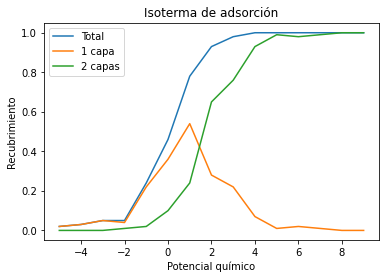

In [17]:
plt.plot(Potenciales,RecubrimientoT, label = 'Total')
plt.plot(Potenciales,Recubrimiento1, label = '1 capa')
plt.plot(Potenciales,Recubrimiento2, label = '2 capas')
plt.title('Isoterma de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')
plt.legend()
plt.show()
 